<a href="https://colab.research.google.com/github/TusharVaibhavK/Essentials/blob/main/DL_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


SGD: Accuracy = 0.8667, Time = 2.26 sec
Adam: Accuracy = 0.9333, Time = 3.11 sec
RMSprop: Accuracy = 0.9333, Time = 1.85 sec


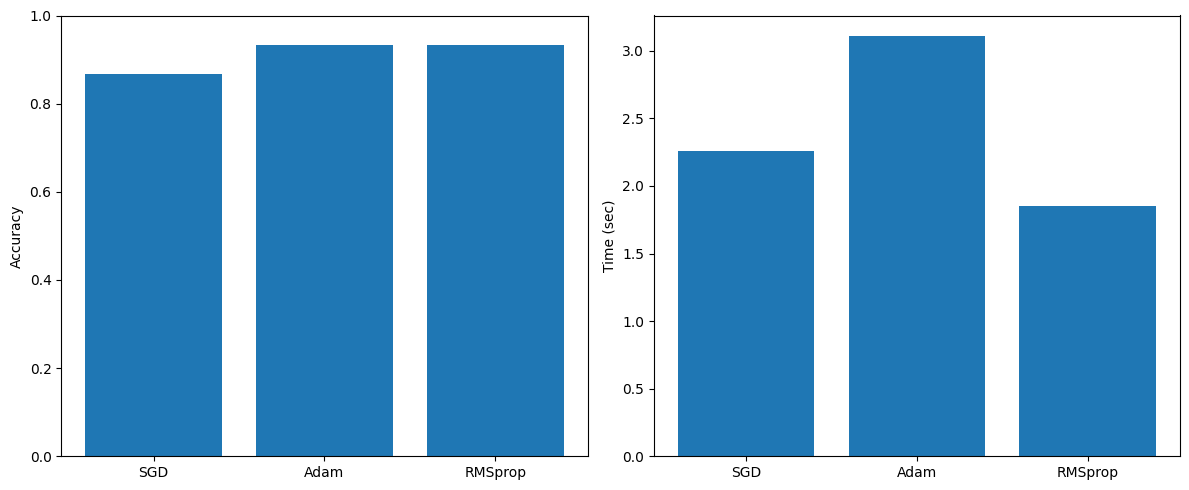

In [ ]:
# THIS IS 1 WITH TIME AS  A METRIC

import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# 1. Load and preprocess Iris dataset
X, y = load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)
y = OneHotEncoder(sparse_output=False).fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 2. Function to train and evaluate
def train_model(optimizer, name):
    model = Sequential([
        Dense(10, activation='tanh', input_shape=(4,)),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    start = time.time()
    model.fit(X_train, y_train, epochs=20, verbose=0)
    duration = time.time() - start
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    print(f"{name}: Accuracy = {accuracy:.4f}, Time = {duration:.2f} sec")
    return accuracy, duration

# 3. Run for different optimizers
optimizers = [('SGD', SGD(0.01)), ('Adam', Adam(0.01)), ('RMSprop', RMSprop(0.01))]
names, accuracies, times = [], [], []

for name, opt in optimizers:
    acc, dur = train_model(opt, name)
    names.append(name)
    accuracies.append(acc)
    times.append(dur)

# 4. Plotting
plt.figure(figsize=(12, 5))

# Accuracy bar chart
plt.subplot(1, 2, 1)
plt.bar(names, accuracies)
plt.ylim(0, 1)
plt.ylabel('Accuracy')

# Time bar chart
plt.subplot(1, 2, 2)
plt.bar(names, times)
plt.ylabel('Time (sec)')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


HeNormal: 0.6333
GlorotUniform: 0.8333
RandomNormal: 0.7000


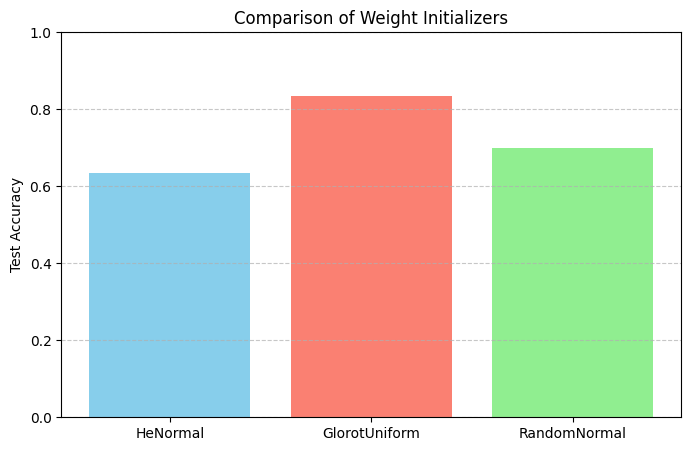

In [ ]:
# 2nd Program

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import HeNormal, GlorotUniform, RandomNormal
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Data preparation
X, y = load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)
y = OneHotEncoder(sparse_output=False).fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store results
results = {}

# Train function
def train(init):
    model = Sequential([
        Dense(10, activation='relu', kernel_initializer=init, input_shape=(4,)),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=20, verbose=0)
    acc = model.evaluate(X_test, y_test, verbose=0)[1]
    name = type(init).__name__
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Evaluate all initializers
for initializer in [HeNormal(), GlorotUniform(), RandomNormal(0., 0.05)]:
    train(initializer)

# Plotting the comparison
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Comparison of Weight Initializers')
plt.ylabel('Test Accuracy')
plt.ylim(0.0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


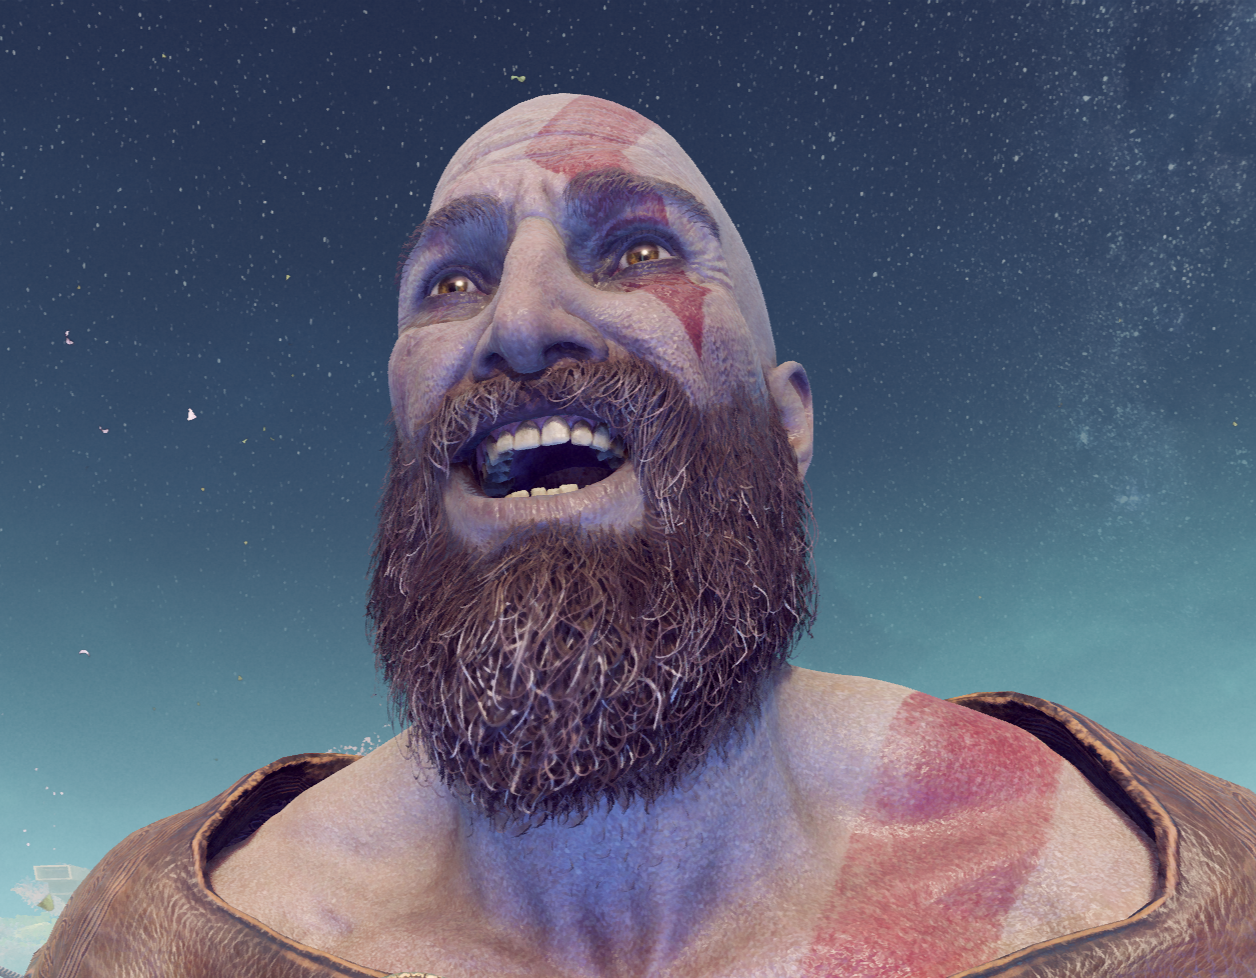

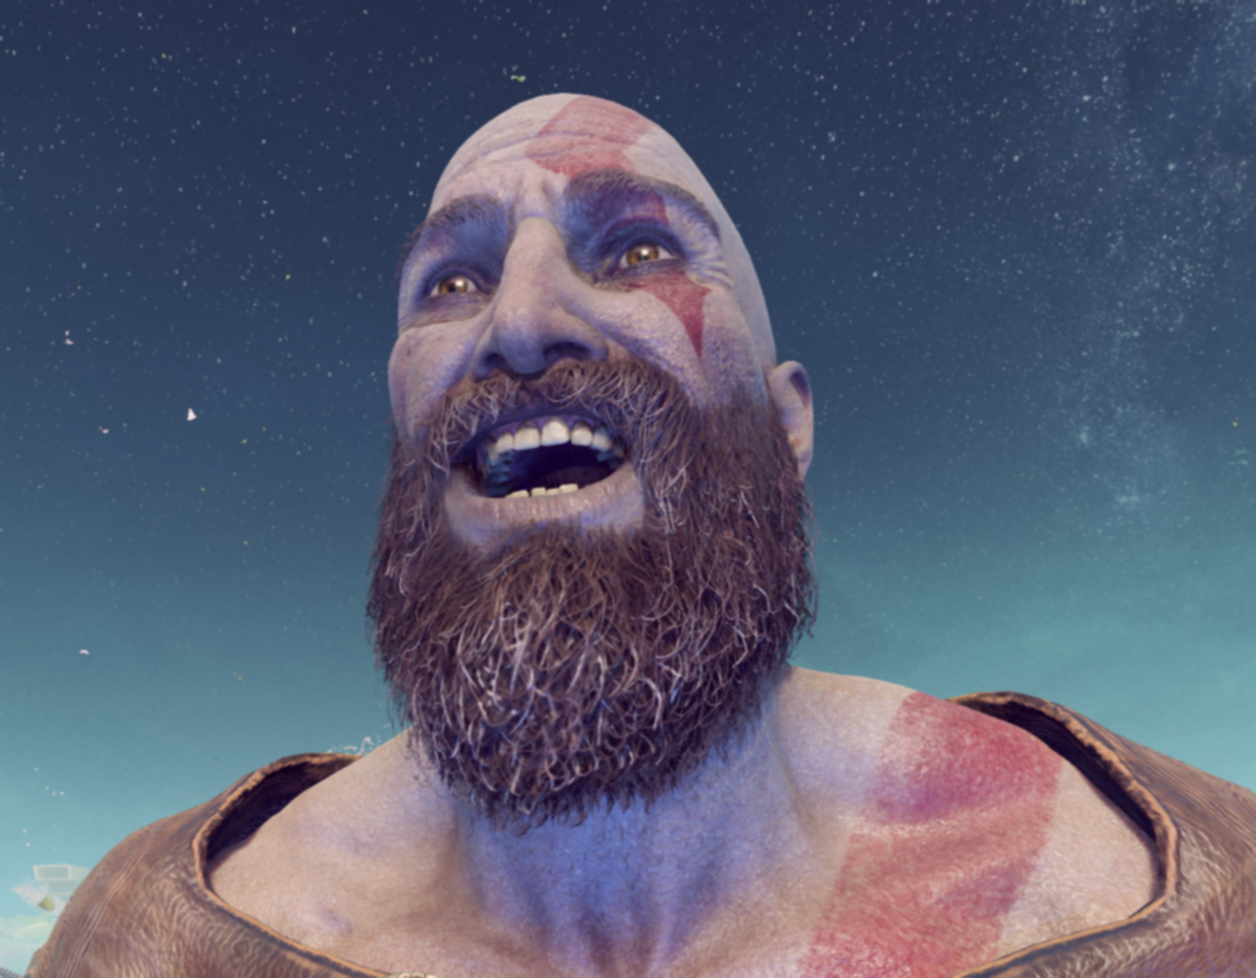

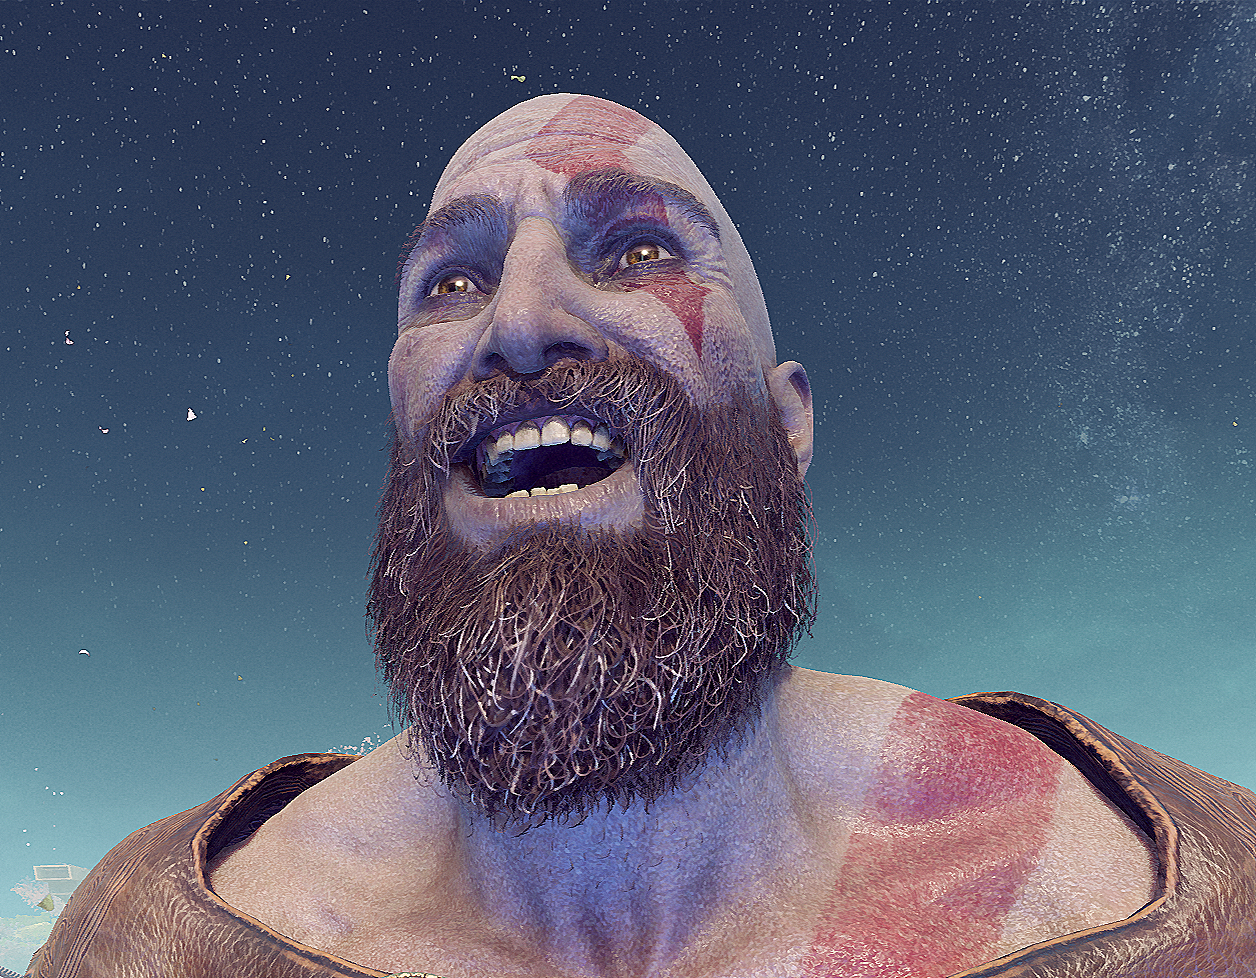

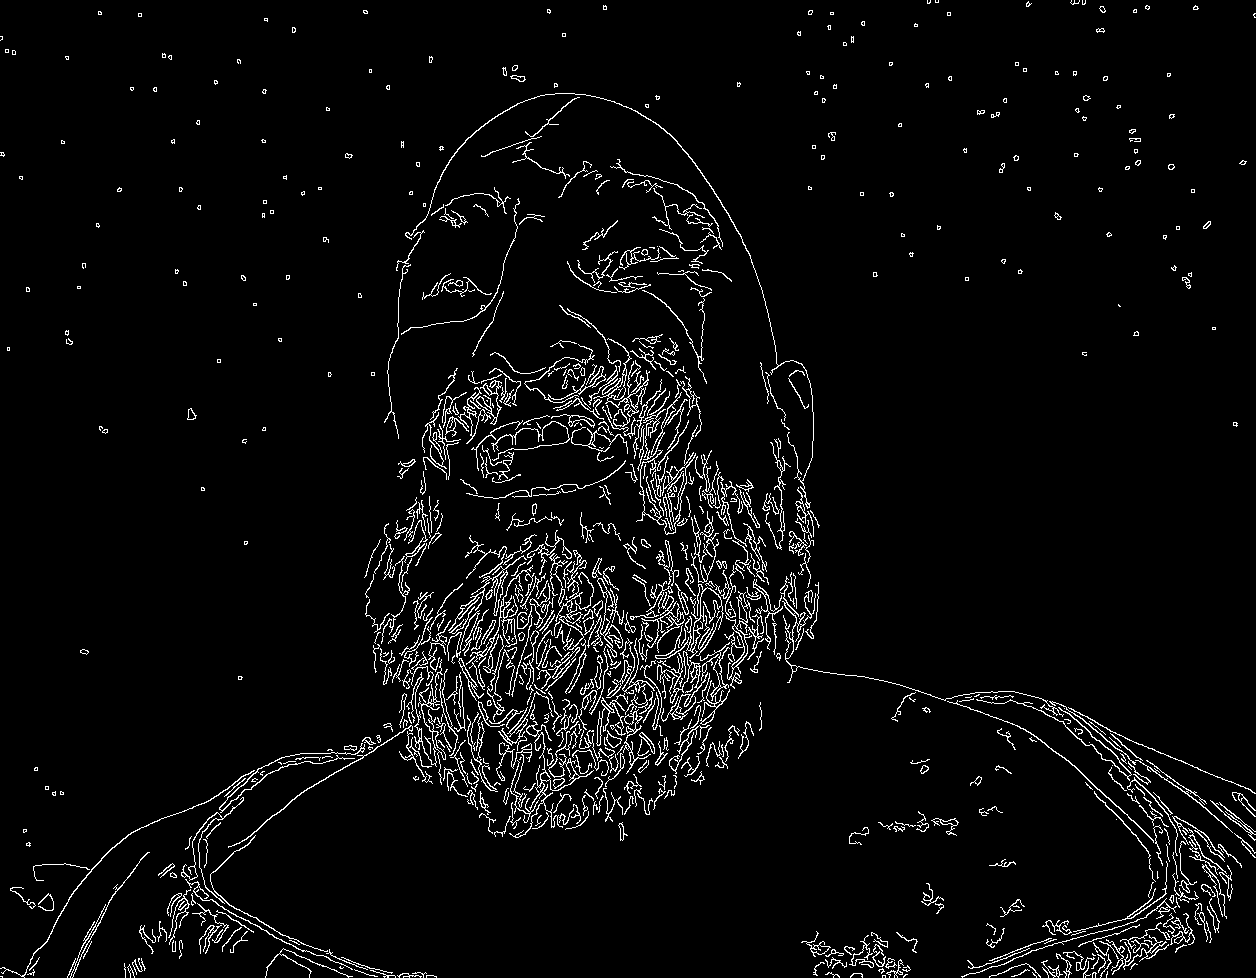

In [1]:
# 3rd one this has sharpening

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('kratos.jpeg')

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply sharpening filter
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
sharpened_image = cv2.filter2D(image, -1, sharpen_kernel)

# Edge detection on the blurred image
edges = cv2.Canny(blurred_image, 50, 150)

# Display results
cv2_imshow(image)
cv2_imshow(blurred_image)
cv2_imshow(sharpened_image)
cv2_imshow(edges)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


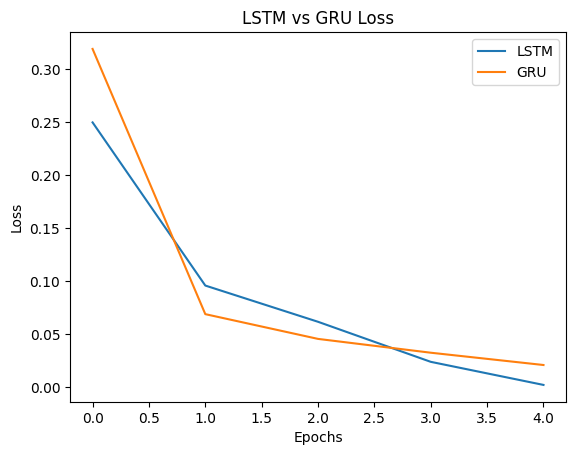

In [ ]:
# 5th Program

import numpy as np, tensorflow as tf, matplotlib.pyplot as plt

# Data
data = np.sin(np.linspace(0, 100, 1000))
X = np.array([data[i-10:i] for i in range(10, len(data))])[..., None]
y = data[10:]

# Train function
def train(cell):
    model = tf.keras.Sequential([cell(32, input_shape=(10, 1)), tf.keras.layers.Dense(1)])
    model.compile('adam', 'mse')
    return model.fit(X, y, epochs=5, verbose=0).history['loss']

lstm_loss = train(tf.keras.layers.LSTM)
gru_loss = train(tf.keras.layers.GRU)

# Results
plt.plot(lstm_loss, label='LSTM'), plt.plot(gru_loss, label='GRU')
plt.xlabel('Epochs'), plt.ylabel('Loss'), plt.title('LSTM vs GRU Loss'), plt.legend()
plt.show()


Training with LSTM

Training with GRU


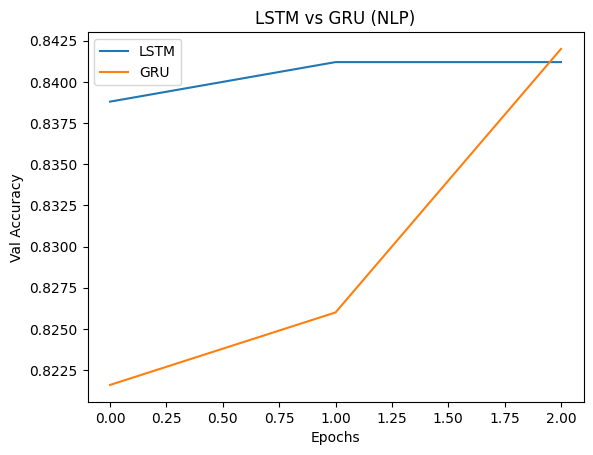

In [ ]:
# 6th Program


import tensorflow as tf, matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Data (IMDb sentiment: binary classification)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)
X_train, X_test = pad_sequences(X_train, maxlen=100), pad_sequences(X_test, maxlen=100)

# Train function
def train(cell):
    print(f"\nTraining with {cell.__name__}")
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(5000, 32, input_length=100),
        cell(32),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
    h = model.fit(X_train, y_train, epochs=3, batch_size=64, verbose=0, validation_split=0.1)
    return h.history['val_accuracy']

lstm_acc = train(tf.keras.layers.LSTM)
gru_acc = train(tf.keras.layers.GRU)

# Results
plt.plot(lstm_acc, label='LSTM'), plt.plot(gru_acc, label='GRU')
plt.xlabel('Epochs'), plt.ylabel('Val Accuracy'), plt.title('LSTM vs GRU (NLP)'), plt.legend()
plt.show()

In [ ]:
# 7th Program


import numpy as np, tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Training data
eng = ["hello", "thank you"]
fre = ["<start> bonjour <end>", "<start> merci <end>"]

# Tokenization
eng_tok = Tokenizer(); fre_tok = Tokenizer(filters='', oov_token='<unk>')
eng_tok.fit_on_texts(eng); fre_tok.fit_on_texts(fre)

eng_seq = pad_sequences(eng_tok.texts_to_sequences(eng), padding='post')
fre_seq = pad_sequences(fre_tok.texts_to_sequences(fre), padding='post')
dec_inp = fre_seq[:, :-1]; dec_tar = fre_seq[:, 1:]

# Model
vocab_eng = len(eng_tok.word_index)+1
vocab_fre = len(fre_tok.word_index)+1
max_len = eng_seq.shape[1]; embed = 32; latent = 64

enc_in = Input(shape=(max_len,))
enc_emb = Embedding(vocab_eng, embed)(enc_in)
_, h, c = LSTM(latent, return_state=True)(enc_emb)

dec_in = Input(shape=(dec_inp.shape[1],))
dec_emb = Embedding(vocab_fre, embed)(dec_in)
dec_out = LSTM(latent, return_sequences=True)(dec_emb, initial_state=[h, c])
out = Dense(vocab_fre, activation='softmax')(dec_out)

model = Model([enc_in, dec_in], out)
model.compile('adam', 'sparse_categorical_crossentropy')
model.fit([eng_seq, dec_inp], dec_tar, epochs=300, verbose=0)

# Translate function
def translate(text):
    inp = pad_sequences(eng_tok.texts_to_sequences([text]), maxlen=max_len, padding='post')
    out = [fre_tok.word_index['<start>']]

    for _ in range(dec_inp.shape[1]):
        dec_seq = pad_sequences([out], maxlen=dec_inp.shape[1], padding='post')
        pred = model.predict([inp, dec_seq], verbose=0)
        next_token = np.argmax(pred[0, len(out)-1])
        if next_token == fre_tok.word_index['<end>']: break
        out.append(next_token)

    return ' '.join(fre_tok.index_word[i] for i in out[1:])

# Test
print(translate("hello"))       # bonjour
print(translate("thank you"))   # merci

bonjour
merci


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:820: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_attentions` is. When `return_dict_in_generate` is not `True`, `output_attentions` is ignored.
  warnings.warn(


generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:1667: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed in v5. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
BartModel is using BartSdpaAttention, but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `layer_head_mask` not None. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


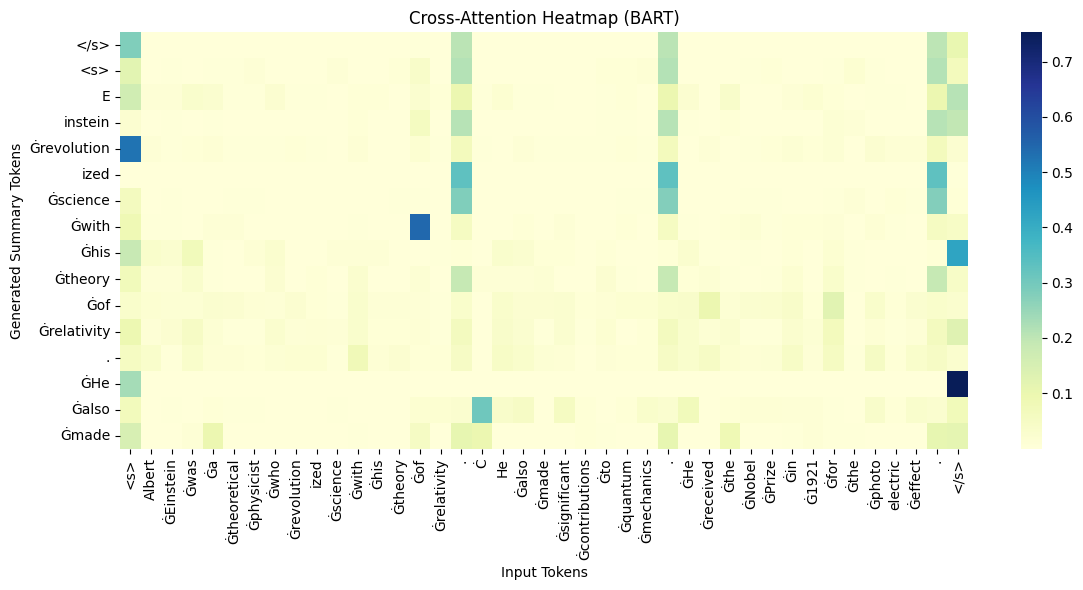

In [ ]:
# 8th Program


import torch
from transformers import BartTokenizer, BartForConditionalGeneration
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 🔹 Load BART model with attentions enabled
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name, output_attentions=True)

# 🔹 Input text
text = """Albert Einstein was a theoretical physicist who revolutionized science with his theory of relativity.
He also made significant contributions to quantum mechanics. He received the Nobel Prize in 1921 for the photoelectric effect."""

# 🔹 Tokenize
inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True)
input_ids = inputs["input_ids"]

# 🔹 Generate summary
output = model.generate(
    input_ids,
    max_length=40,
    min_length=10,
    num_beams=4,
    early_stopping=True,
    output_attentions=True,
    return_dict_in_generate=True
)

summary_ids = output.sequences[0]
summary_tokens = tokenizer.convert_ids_to_tokens(summary_ids)
input_tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

# 🔹 Get cross-attention from first decoder layer, averaged across heads
cross_attn = output.cross_attentions[0]  # List of tuples (layers)
avg_attn = cross_attn[0].mean(dim=0).squeeze().detach().numpy()  # (target_len, source_len)

# 🔹 Truncate tokens to match shapes
target_tokens = summary_tokens[:avg_attn.shape[0]]
source_tokens = input_tokens[:avg_attn.shape[1]]

# 🔹 Plot attention heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(avg_attn, xticklabels=source_tokens, yticklabels=target_tokens, cmap="YlGnBu")
plt.xlabel("Input Tokens")
plt.ylabel("Generated Summary Tokens")
plt.title("Cross-Attention Heatmap (BART)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()